In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [5]:

df = pd.read_csv("diabetes.csv")    
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

In [7]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [8]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
Pedigree         float64
Age                int64
Outcome            int64
dtype: object

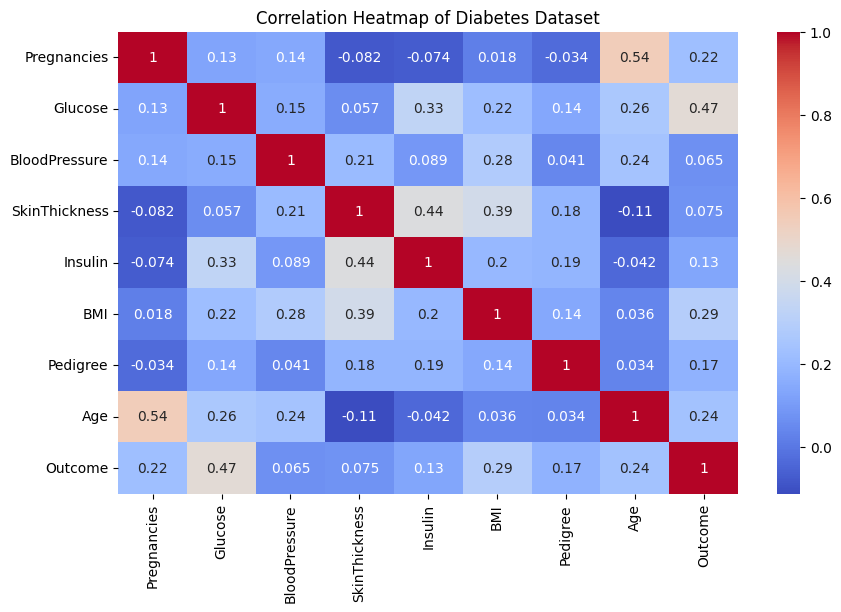

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Diabetes Dataset")
plt.show()


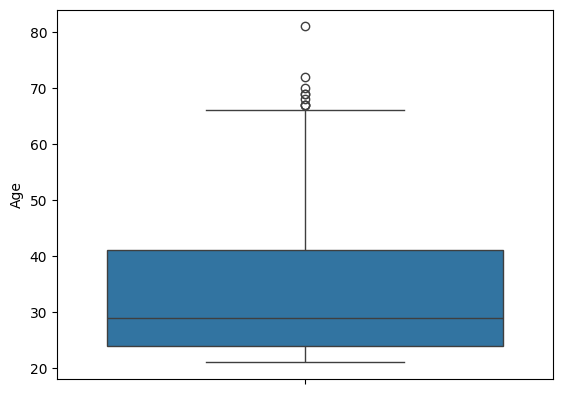

In [10]:
sns.boxplot(df['Age'])
plt.show()

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

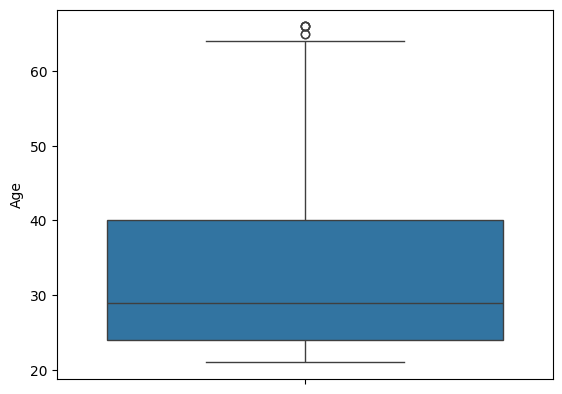

In [13]:
sns.boxplot(df['Age'])
plt.show()

In [14]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [16]:
df['Outcome'].value_counts()

Outcome
0    439
1    200
Name: count, dtype: int64

In [33]:
from imblearn.over_sampling import SMOTE
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)

# Step 7: Split into train and test sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

'''param_grid = {'n_neighbors': range(1, 31)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

best_k = grid.best_params_['n_neighbors']
print(f"✅ Best K Value: {best_k}")'''

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)




'''knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)'''

'knn=KNeighborsClassifier(n_neighbors=7)\nknn.fit(X_train,y_train)\ny_pred=knn.predict(X_test)'

In [34]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [39]:
print("\n=== Model Evaluation ===")
print("Confusion Matrix:\n", cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Error Rate: {:.2f}%".format(error_rate * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))


=== Model Evaluation ===
Confusion Matrix:
 [[68 23]
 [ 8 77]]
Accuracy: 82.39%
Error Rate: 17.61%
Precision: 0.77
Recall: 0.91


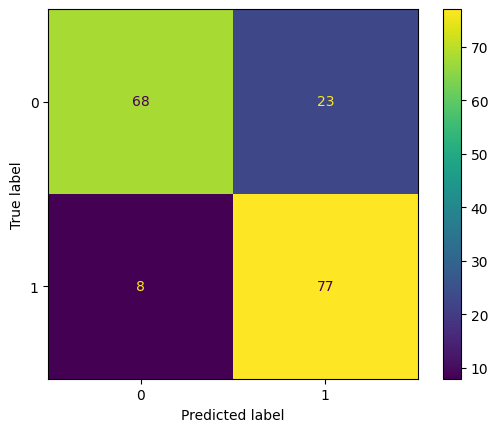

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
dsp=ConfusionMatrixDisplay(confusion_matrix=cm)
dsp.plot()